In [1]:
# ------------- data analysis and wrangling-------------------
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------------------

# ------- import các tool visualization ----------------------
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\PYTHON LEARNING\DATA\2019ncov.csv')
data.tail(10)

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1262,1263,02/11/2020 20:44:00,NaN,Nepal,2020-01-31 08:15:53,1.0,0.0,0.0
1263,1264,02/11/2020 20:44:00,NaN,Sri Lanka,2020-02-08 03:43:03,1.0,0.0,1.0
1264,1265,02/11/2020 20:44:00,NaN,Sweden,2020-02-01 02:13:26,1.0,0.0,0.0
1265,1266,02/11/2020 20:44:00,"Boston, MA",US,2020-02-01 19:43:03,1.0,0.0,0.0
1266,1267,02/11/2020 20:44:00,"Los Angeles, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
1267,1268,02/11/2020 20:44:00,"Madison, WI",US,2020-02-05 21:53:02,1.0,0.0,0.0
1268,1269,02/11/2020 20:44:00,"Orange, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
1269,1270,02/11/2020 20:44:00,"San Diego County, CA",US,2020-02-11 01:23:05,1.0,0.0,0.0
1270,1271,02/11/2020 20:44:00,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0
1271,1272,02/11/2020 20:44:00,"Tempe, AZ",US,2020-02-01 19:43:03,1.0,0.0,0.0


In [3]:
# Quan sát thấy datetime cần tách thời gian bên trong ra, xử lí và xem lại
data.Date=data.Date.apply(pd.to_datetime)
data.Date=data["Date"].dt.strftime('%m/%d/%Y')
data.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

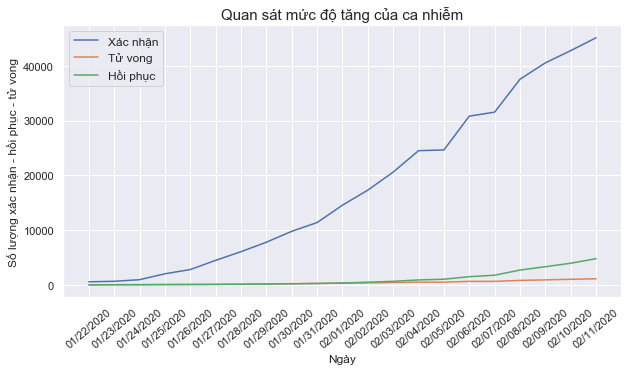

In [4]:
# thiết lập dữ liệu thành time series để chạy các thuật toán time series sau
data_time=data.groupby(["Date"],as_index=False)["Confirmed","Deaths","Recovered"].sum()
# trực quan mức độ tăng của ca lây nhiễm
fig = plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Confirmed",data=data_time)
sns.lineplot(x="Date", y="Deaths",data=data_time)
sns.lineplot(x="Date", y="Recovered",data=data_time)
plt.xlabel('Ngày')
plt.ylabel('Số lượng xác nhận - hồi phục - tử vong')
plt.title('Quan sát mức độ tăng của ca nhiễm',fontsize=15)
plt.legend(labels=["Xác nhận",'Tử vong ',"Hồi phục"],fontsize=12)
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

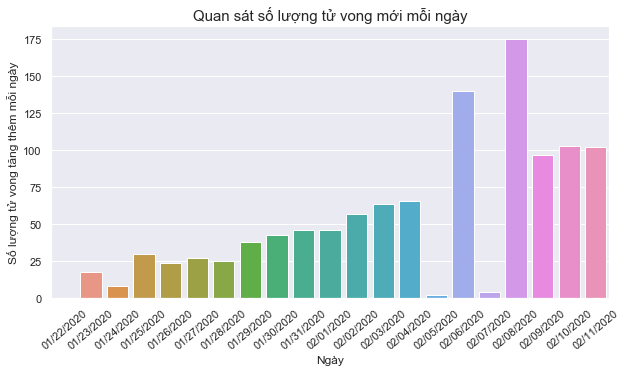

In [5]:
a = data_time['Deaths']
b = [0]
for i in range(len(a)-1):
    i=i+1
    b.append(a[i]-a[i-1])
data_time['Deaths per Days'] = b
fig = plt.figure(figsize=(10,5))
sns.barplot(x="Date", y="Deaths per Days",data=data_time)
plt.xlabel('Ngày')
plt.ylabel('Số lượng tử vong tăng thêm mỗi ngày')
plt.title('Quan sát số lượng tử vong mới mỗi ngày',fontsize=15)
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

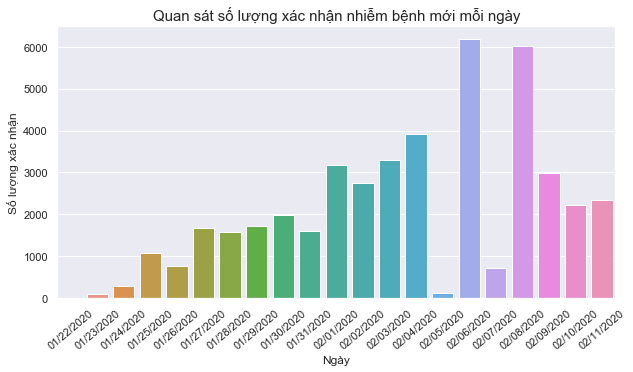

In [6]:
a1 = data_time['Confirmed']
b1 = [0]
for i in range(len(a1)-1):
    i=i+1
    b1.append(a1[i]-a1[i-1])
data_time['Confirmed per Days'] = b1
fig = plt.figure(figsize=(10,5))
sns.barplot(x="Date", y="Confirmed per Days",data=data_time)
plt.xlabel('Ngày')
plt.ylabel('Số lượng xác nhận')
plt.title('Quan sát số lượng xác nhận nhiễm bệnh mới mỗi ngày',fontsize=15)
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

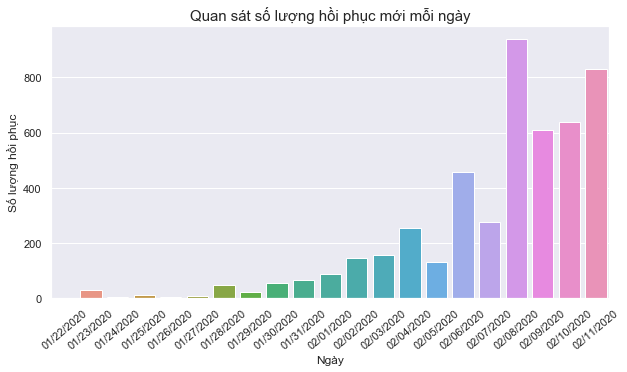

In [7]:
a2 = data_time['Recovered']
b2 = [0]
for i in range(len(a2)-1):
    i=i+1
    b2.append(a2[i]-a2[i-1])
data_time['Recovered per Days'] = b2
fig = plt.figure(figsize=(10,5))
sns.barplot(x="Date", y="Recovered per Days",data=data_time)
plt.xlabel('Ngày')
plt.ylabel('Số lượng hồi phục')
plt.title('Quan sát số lượng hồi phục mới mỗi ngày',fontsize=15)
plt.xticks(rotation=40)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

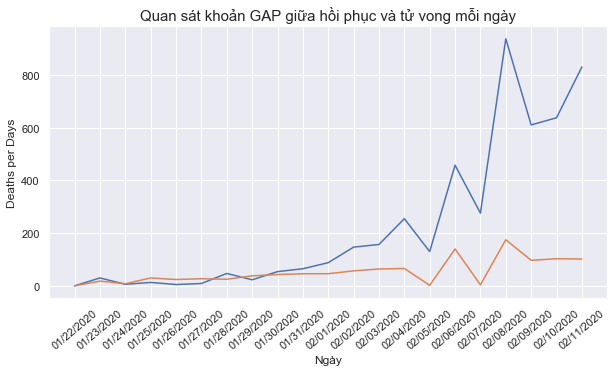

In [8]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Recovered per Days",data=data_time)
sns.lineplot(x="Date", y="Deaths per Days",data=data_time)
plt.xlabel('Ngày')
plt.title('Quan sát khoản GAP giữa hồi phục và tử vong mỗi ngày',fontsize=15)
plt.xticks(rotation=40)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

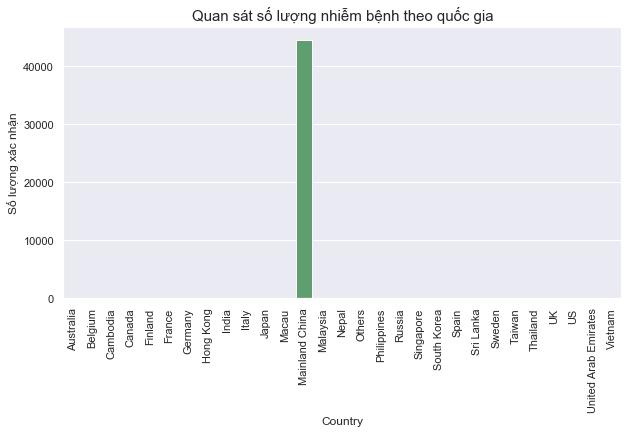

In [9]:
# Xử lí số liệu date gần nhất
virus_data_latest=data[(data["Date"]==data["Date"].max())]
data_country=virus_data_latest.groupby(["Country"],as_index=False)["Confirmed","Deaths","Recovered"].sum()
# biểu diễn số liệu
fig = plt.figure(figsize=(10,5))
sns.barplot(x="Country", y="Confirmed", palette="deep",data = data_country)
plt.ylabel('Số lượng xác nhận')
plt.title('Quan sát số lượng nhiễm bệnh theo quốc gia',fontsize=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

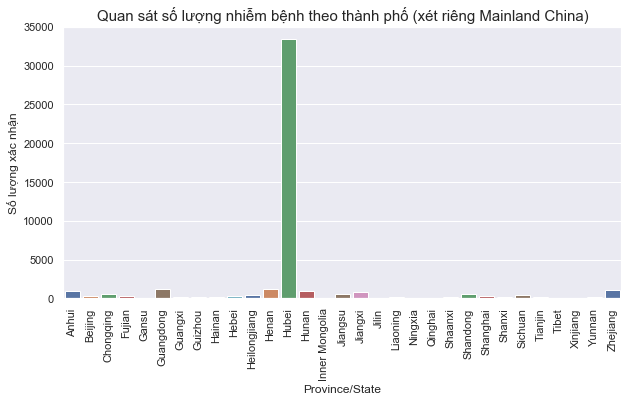

In [10]:
china1=data[(data["Country"]=='Mainland China')]
china=china1[(china1["Date"]==china1["Date"].max())]
data_china=china.groupby(["Province/State"],as_index=False)["Confirmed","Deaths","Recovered"].sum()
fig = plt.figure(figsize=(10,5))
sns.barplot(x="Province/State", y="Confirmed", palette="deep",data = data_china)
plt.ylabel('Số lượng xác nhận')
plt.title('Quan sát số lượng nhiễm bệnh theo thành phố (xét riêng Mainland China)',fontsize=15)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

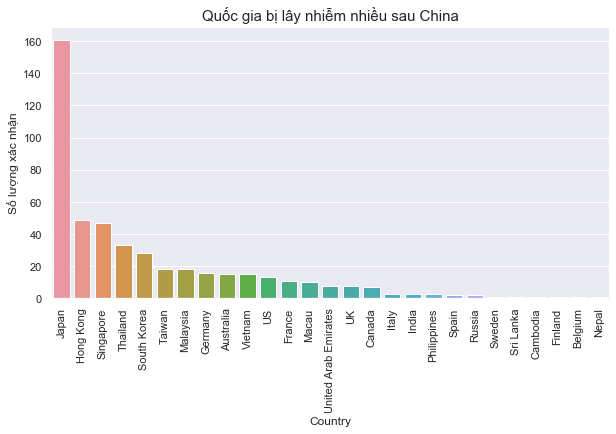

In [11]:
df = data
df.loc[df.Country == 'China', 'Country'] = 'Mainland China'
df.loc[df.Country == 'Others', 'Country'] = 'Japan'
import plotly.express as px
df2=df[(df['Country']!= 'Mainland China') & (df['Date']=='02/11/2020')]
df3=df2.groupby(['Country'],as_index=False).sum().sort_values(by=['Confirmed'], ascending=False)
fig = plt.figure(figsize=(10,5))
sns.barplot(x='Country', y='Confirmed',data = df3)
plt.ylabel('Số lượng xác nhận')
plt.title('Quốc gia bị lây nhiễm nhiều sau China',fontsize=15)
plt.xticks(rotation=90)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.


Text(0.5, 1, 'Mô hình dự báo số lượng nhiễm bệnh - FB Prophet')

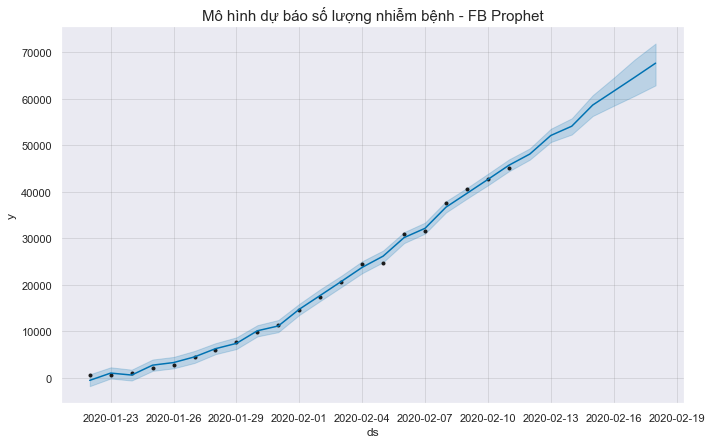

In [12]:
from fbprophet import Prophet
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
confirmed_forecast_plot = m.plot(forecast)
plt.title('Mô hình dự báo số lượng nhiễm bệnh - FB Prophet',fontsize=15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.


Text(0.5, 1, 'Mô hình dự báo số lượng tử vong - FB Prophet')

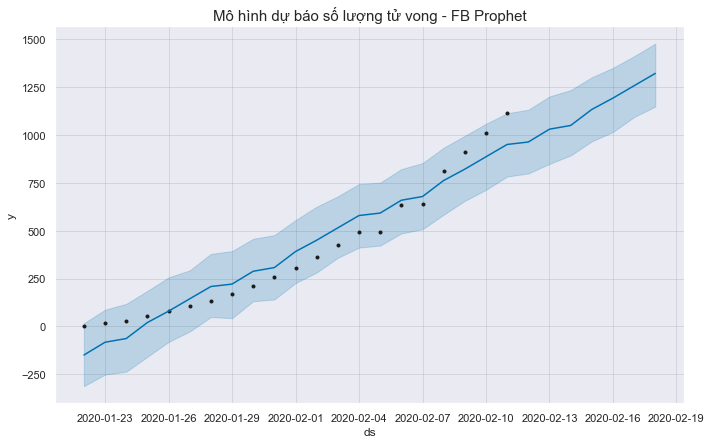

In [13]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
deaths_forecast_plot = m.plot(forecast)
plt.title('Mô hình dự báo số lượng tử vong - FB Prophet',fontsize=15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.


Text(0.5, 1, 'Mô hình dự báo số lượng tử vong - FB Prophet')

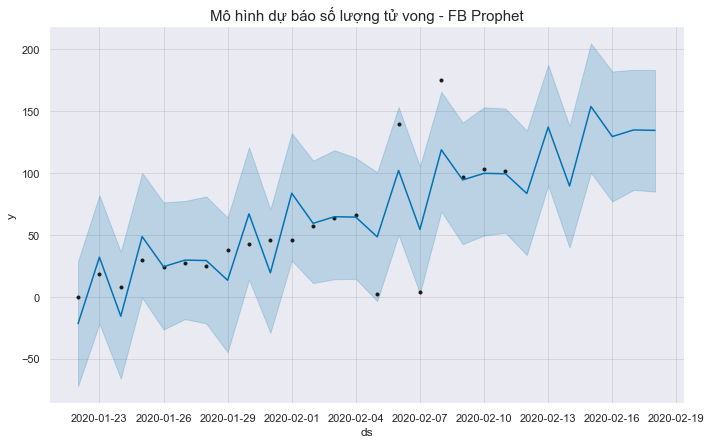

In [14]:
deaths['ds'] = data_time['Date']
deaths['y'] = data_time['Deaths per Days']
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
deaths_forecast_plot = m.plot(forecast)
plt.title('Mô hình dự báo số lượng tử vong - FB Prophet',fontsize=15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.


Text(0.5, 1, 'Mô hình dự báo số lượng hồi phục - FB Prophet')

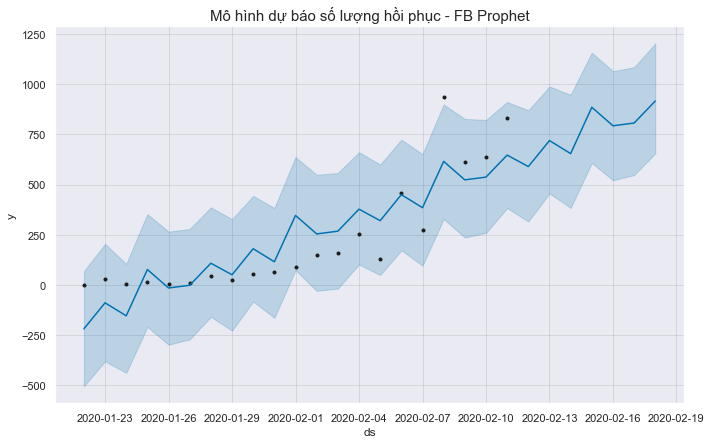

In [16]:
recovered['ds'] = data_time['Date']
recovered['y'] = data_time['Recovered per Days']
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
Recovered_forecast_plot = m.plot(forecast)
plt.title('Mô hình dự báo số lượng hồi phục - FB Prophet',fontsize=15)